<a href="https://colab.research.google.com/github/jonathanhicks97/MLTSA22_JHicks/blob/main/HW2/HW2_JHicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports we have already seen
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#new imports we will learn to use
import statsmodels.api as sm # for the statistical analysis to find out if the TS is stationary
import glob #to sort files
from pandas.plotting import scatter_matrix #will make useful correlatin plots
import json #reads and writes json files, see programmatic data access notebooks
import os #this runs system level commands, see programmatic data access notebooks

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#some annoying wornings show up - suppress them with this
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

# data ingestion

use kaggle economic data accessing it programmatically at
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data#a.us.txt

Access it programmatically as was done for the TESLA data in https://github.com/fedhere/MLTSA22_FBianco/blob/main/Lab3ProgrammaticDataAccess/Kaggledata_load.ipynb

Save it in a directory called MLTSA22/HW2/data in your google drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
...

Ellipsis

In [ ]:
ls /content/drive/MyDrive/MLTSA22/HW2/Data/Stocks

aaap.us.txt       dhr.us.txt        jmlp.us.txt       quad.us.txt
aaba.us.txt       dht.us.txt        jmm.us.txt        quik.us.txt
aac.us.txt        dhvw.us.txt       jmom.us.txt       qumu.us.txt
aal.us.txt        dhxm.us.txt       jmpb.us.txt       quot.us.txt
aamc.us.txt       dhx.us.txt        jmpc.us.txt       qure.us.txt
aame.us.txt       dhy.us.txt        jmp.us.txt        q.us.txt
aan.us.txt        dial.us.txt       jmt.us.txt        qval.us.txt
aaoi.us.txt       diax.us.txt       jmu.us.txt        qvca.us.txt
aaon.us.txt       din.us.txt        jnce.us.txt       qvcb.us.txt
aapl.us.txt       diod.us.txt       jnj.us.txt        qvm.us.txt
aap.us.txt        disca.us.txt      jnpr.us.txt       qxgg.us.txt
aat.us.txt        discb.us.txt      jnp.us.txt        qxmi.us.txt
aa.us.txt         disck.us.txt      jobs.us.txt       qxrr.us.txt
aau.us.txt        dish.us.txt       job.us.txt        qxtr.us.txt
aav.us.txt        dis.us.txt        joe.us.txt        race.us.txt
aaww.us.txt   

In [ ]:
#use glob.glob to list the files in Data/Stocks. 
#This command returns a list, turn it into an array with np.array(<list>)
#Sort the array (alphabetically) with np.sort
allfiles = np.sort(np.array(glob.glob("/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/*.txt")))


In [ ]:
allfiles[0:10]

array(['/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/a.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aa.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aaap.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aaba.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aac.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aal.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aamc.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aame.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aan.us.txt',
       '/content/drive/MyDrive/MLTSA22/HW2/Data/Stocks/aaoi.us.txt'],
      dtype='<U63')

# read in the first 10 files in Data/Stock (first in alphabetical order.)

each file can be read with ```pd.read_csv()```

merge each file so that you end up with a single dataframe (e.g. call it tss)

```df1 = pd.read_csv()```

```df2 = pd.read_csv()```

```newdf = df.merge(df2)```

you want to merge on the date: this means the resulting dataframe will have a row for each date that is available in both files and all the columns of the files you are merging. To achieve this pass the argument ```on="Date"``` to ```df.merge()```

I also recommand you turn the Date column into the dataframe index

```tss.set_index("Date", inplace=True)```

In [ ]:
?pd.DataFrame.merge

In [ ]:


df1 = pd.read_csv(allfiles[0], usecols = ("Date", "Close"))
df2 = pd.read_csv(allfiles[1], usecols = ("Date", "Close"))
df3 = pd.read_csv(allfiles[2], usecols = ("Date", "Close"))
df4 = pd.read_csv(allfiles[3], usecols = ("Date", "Close"))
df5 = pd.read_csv(allfiles[4], usecols = ("Date", "Close"))
df6 = pd.read_csv(allfiles[5], usecols = ("Date", "Close"))
df7 = pd.read_csv(allfiles[6], usecols = ("Date", "Close"))
df8 = pd.read_csv(allfiles[7], usecols = ("Date", "Close"))
df9 = pd.read_csv(allfiles[8], usecols = ("Date", "Close"))
df10 = pd.read_csv(allfiles[9], usecols = ("Date", "Close"))


  

tss = pd.DataFrame.merge(df1, df2, on = 'Date', suffixes = ("_a","_aa"))
tss = pd.DataFrame.merge(tss, df3, on = 'Date', suffixes = ("","_aaap"))
tss = pd.DataFrame.merge(tss, df4, on = 'Date', suffixes = ("","_aaba"))
tss = pd.DataFrame.merge(tss, df5, on = 'Date', suffixes = ("","_aac"))
tss = pd.DataFrame.merge(tss, df6, on = 'Date', suffixes = ("","_aal"))
tss = pd.DataFrame.merge(tss, df7, on = 'Date', suffixes = ("","_aamc"))
tss = pd.DataFrame.merge(tss, df8, on = 'Date', suffixes = ("","_aame"))
tss = pd.DataFrame.merge(tss, df9, on = 'Date', suffixes = ("","_aan"))
tss = pd.DataFrame.merge(tss, df10, on = 'Date', suffixes = ("","_aaoi"))
 
tss['Date'] = pd.to_datetime(tss['Date'])

tss.rename(columns = {'Close':'Close_aaap'}, inplace = True) #For some reason, it doesnt like adding _aaap to the data for that stock. This line forces it to do that
tss.set_index("Date", inplace = True)




In [ ]:
tss.head()

,Close_a,Close_aa,Close_aaap,Close_aaba,Close_aac,Close_aal,Close_aamc,Close_aame,Close_aan,Close_aaoi
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


In [ ]:
tss.tail()

,Close_a,Close_aa,Close_aaap,Close_aaba,Close_aac,Close_aal,Close_aamc,Close_aame,Close_aan,Close_aaoi
Date,,,,,,,,,,
2017-11-02,68.13,47.46,81.00,70.51,10.02,47.257,88.00,3.65,35.80,39.28
2017-11-03,68.37,47.12,80.99,70.23,10.08,47.346,80.40,3.60,36.43,37.82
2017-11-07,68.25,46.97,81.00,72.22,11.07,46.358,81.00,3.40,34.44,37.89
2017-11-09,67.47,43.33,81.00,70.19,10.88,45.670,84.05,3.50,35.62,43.20
2017-11-10,66.81,43.01,80.98,70.56,11.28,45.820,80.10,3.50,36.59,45.30


In [ ]:
tss.shape

(447, 10)

#  data inspection

plot each time series (ts)

In [ ]:
tss.iloc[0], tss.iloc[-1] 

(Close_a       36.901
 Close_aa      17.779
 Close_aaap    24.500
 Close_aaba    33.380
 Close_aac     22.560
 Close_aal     43.524
 Close_aamc    20.750
 Close_aame     4.796
 Close_aan     24.649
 Close_aaoi    16.760
 Name: 2015-11-11 00:00:00, dtype: float64, Close_a       66.81
 Close_aa      43.01
 Close_aaap    80.98
 Close_aaba    70.56
 Close_aac     11.28
 Close_aal     45.82
 Close_aamc    80.10
 Close_aame     3.50
 Close_aan     36.59
 Close_aaoi    45.30
 Name: 2017-11-10 00:00:00, dtype: float64)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


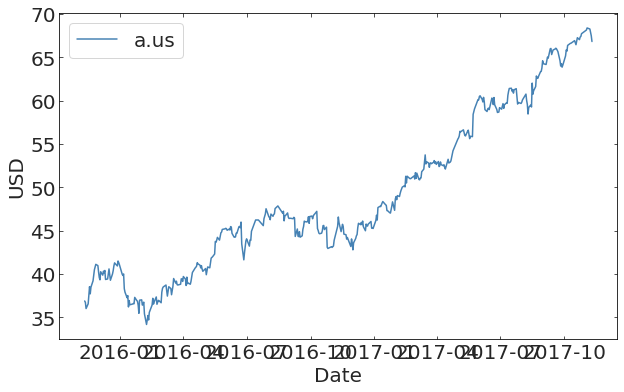

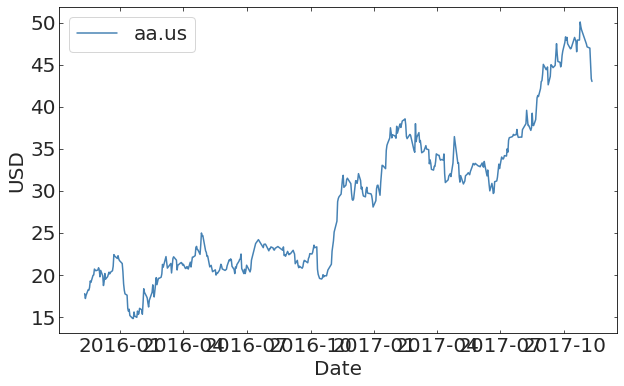

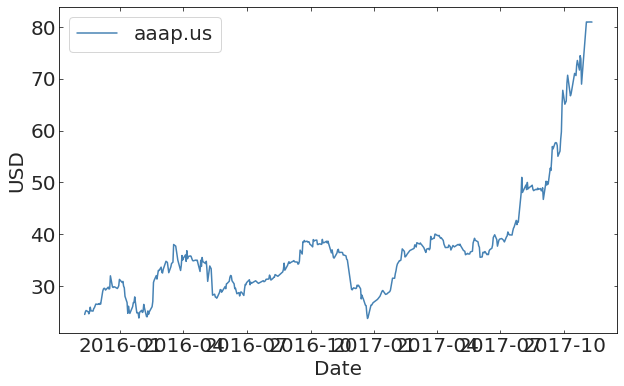

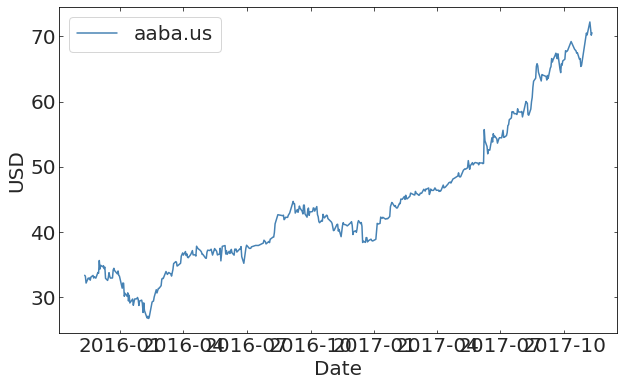

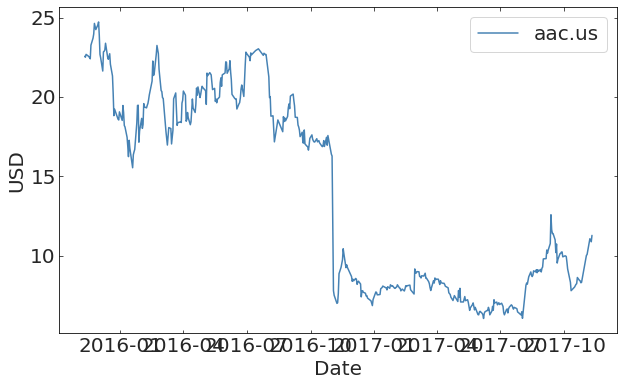

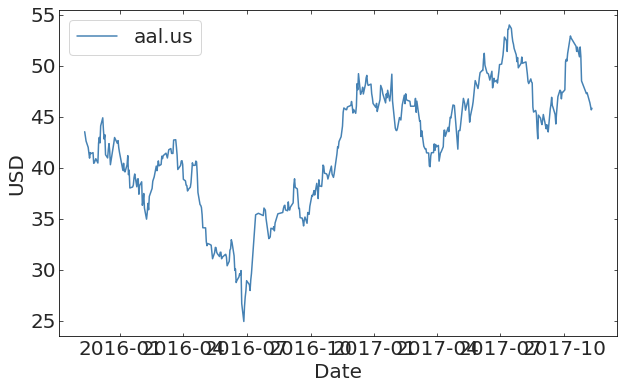

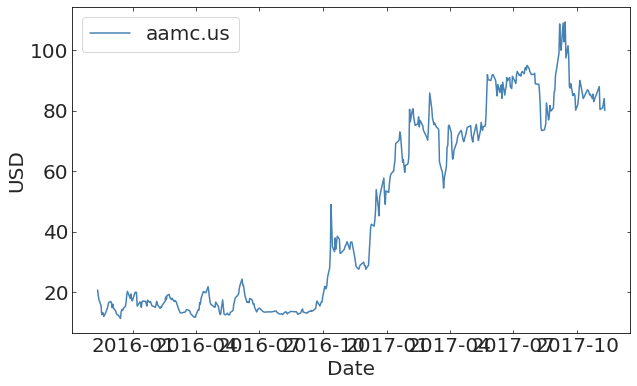

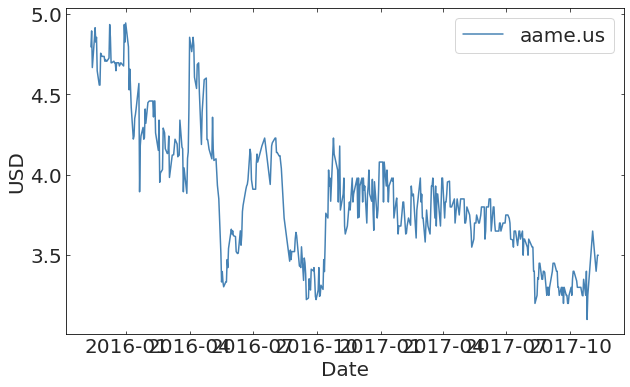

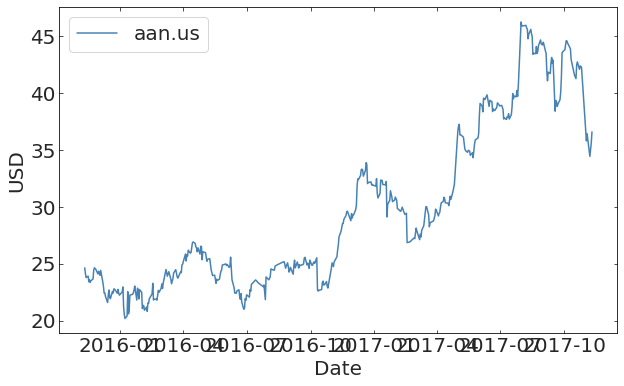

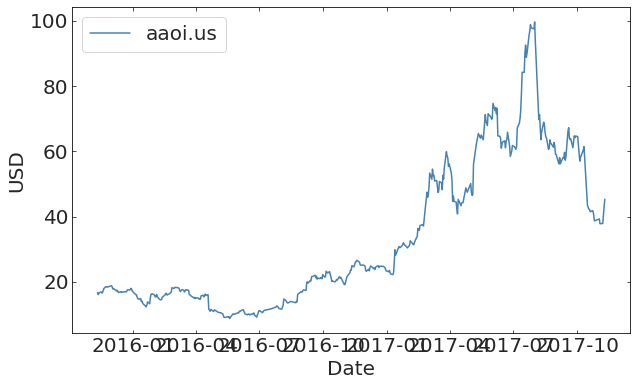

In [ ]:
# plot the 10 time series individually since they are only 10
pl.figure
pl.plot(tss["Close_a"], label = 'a.us')
xlabel('Date')
ylabel('USD')
pl.legend()


pl.figure()
pl.plot(tss["Close_aa"], label = 'aa.us')
xlabel('Date')
ylabel('USD')
pl.legend()

pl.figure()
pl.plot(tss["Close_aaap"], label = 'aaap.us')
xlabel('Date')
ylabel('USD')
pl.legend()

pl.figure()
pl.plot(tss["Close_aaba"], label = 'aaba.us')
xlabel('Date')
ylabel('USD')
legend()

pl.figure()
pl.plot(tss["Close_aac"], label = 'aac.us')
xlabel('Date')
ylabel('USD')
legend()

pl.figure()
pl.plot(tss["Close_aal"], label = 'aal.us')
xlabel('Date')
ylabel('USD')
legend()

pl.figure()
pl.plot(tss["Close_aamc"], label = 'aamc.us')
xlabel('Date')
ylabel('USD')
legend()

pl.figure()
pl.plot(tss["Close_aame"], label = 'aame.us')
xlabel('Date')
ylabel('USD')
legend()

pl.figure()
pl.plot(tss["Close_aan"], label = 'aan.us')
xlabel('Date')
ylabel('USD')
legend()


pl.figure()
pl.plot(tss["Close_aaoi"],label = 'aaoi.us')
xlabel('Date')
ylabel('USD')
legend()










Fig 1: Plots of each Stock's performance over time. 

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


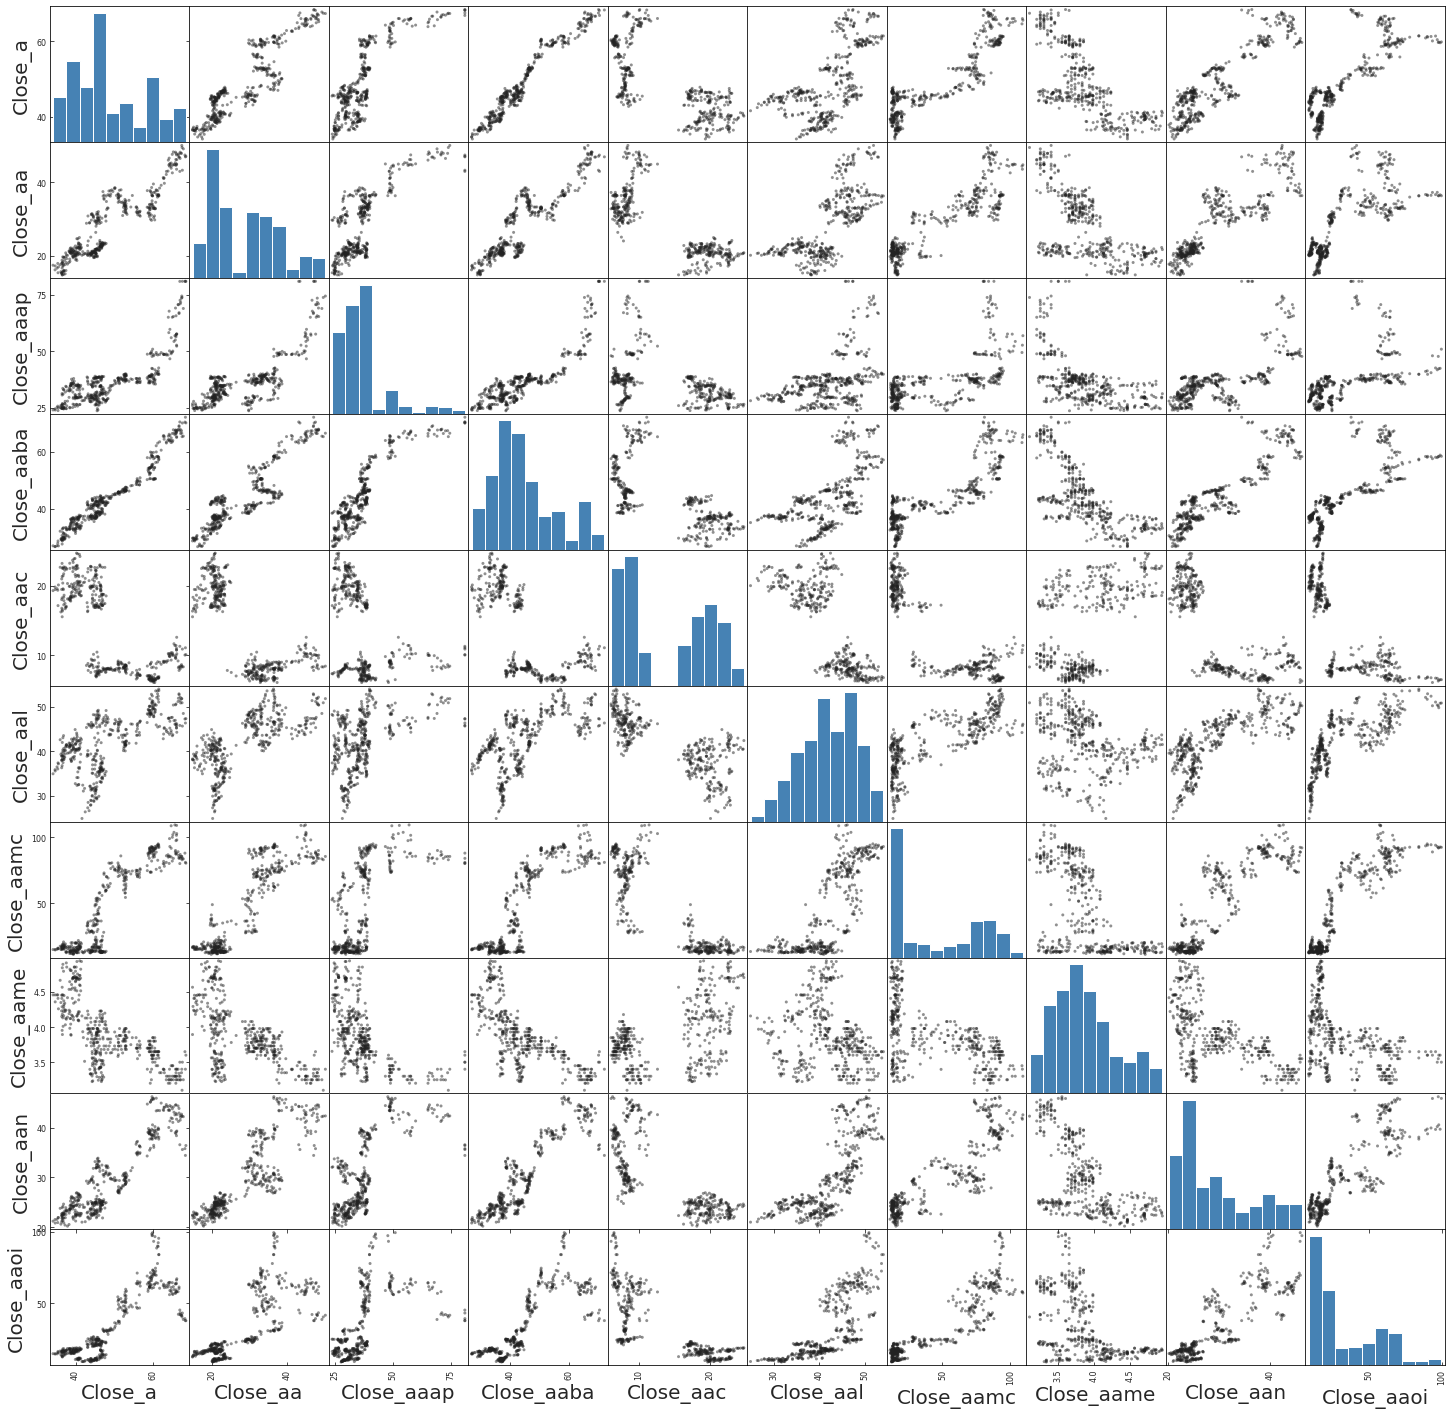

In [ ]:
scatter_matrix(tss, figsize=(25,25), color="#222222");

Fig 2: Scatter matrices between all stocks closing values. Individual scatter plots are indicative of correlation between the two stocks.

In [ ]:
print("Correlation matrix of 2015-2017 stock values")
tss.corr()

Correlation matrix of 2015-2017 stock values


,Close_a,Close_aa,Close_aaap,Close_aaba,Close_aac,Close_aal,Close_aamc,Close_aame,Close_aan,Close_aaoi
Close_a,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
Close_aa,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
Close_aaap,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
Close_aaba,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
Close_aac,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
Close_aal,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
Close_aamc,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
Close_aame,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
Close_aan,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
Close_aaoi,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


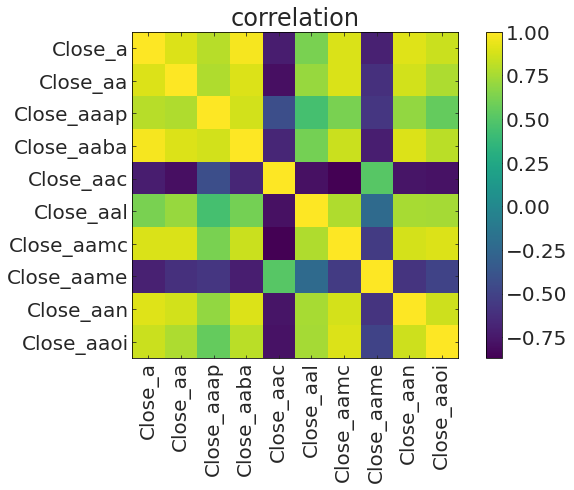

In [ ]:
# you can visualize it as a heat map with imshow
pl.imshow(tss.corr())
pl.colorbar()
pl.title("correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns);


Fig 3: Correlation plot between closing prices of various stocks. It is noteworthy that aac and aame are negatively correlated to all other stocks, but are modeerately correlated with one another. The remaining stocks are all well correlated with one another, indicating their change may just be related to the success of the market as a whole.

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

You will have to set a statistival threshold - choose 2-sigma. What fraction of a gaussian distribution is not contained inside of 2-sigma? this is the threshold you want to pass

In [ ]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for f in tss.columns:
  pval = sm.tsa.stattools.adfuller(tss[f])[1]
  if pval < threshold:
    print(f, 'is stationary: True')
  else:
    print(f, 'is stationary: False')


Stationarity results from the AD Fuller test at a p-value of 0.05
Close_a is stationary: False
Close_aa is stationary: False
Close_aaap is stationary: False
Close_aaba is stationary: False
Close_aac is stationary: False
Close_aal is stationary: False
Close_aamc is stationary: False
Close_aame is stationary: True
Close_aan is stationary: False
Close_aaoi is stationary: False
